In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from rdkit.Chem import PandasTools
import csv 

from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS, AllChem
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters
from rdkit.Chem import rdRGroupDecomposition
rg_params = RGroupDecompositionParameters()
rg_params.onlyMatchAtRGroups = True
from rdkit.Chem.Draw import DrawingOptions
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from PIL import Image

### Plot structures of all SOMD NaN perturbations (vac)

In [8]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

####################
mobley_1034539~mobley_8208692


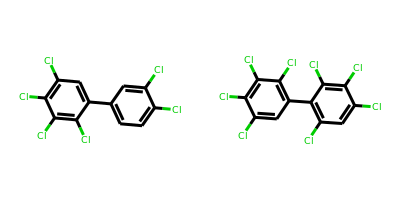

####################
mobley_1034539~mobley_8823527


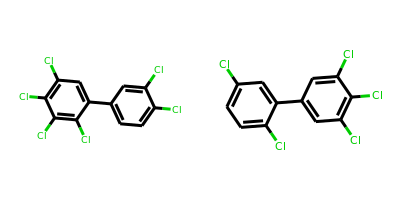

####################
mobley_1034539~mobley_9510785


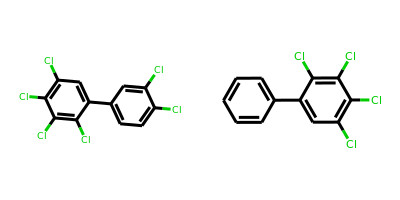

####################
mobley_1079207~mobley_1760914


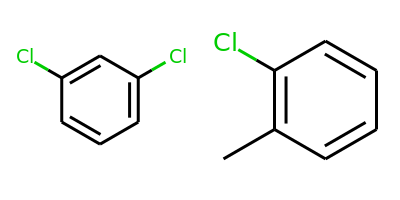

####################
mobley_1079207~mobley_2489709


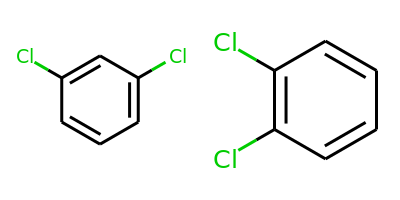

####################
mobley_1079207~mobley_2681549


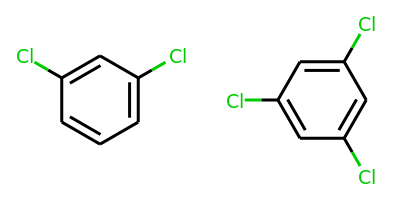

####################
mobley_1079207~mobley_3169935


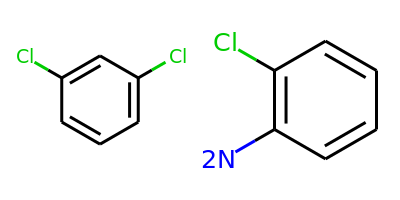

####################
mobley_1178614~mobley_7010316


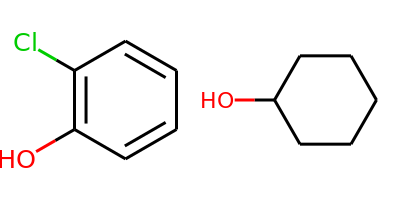

####################
mobley_1178614~mobley_7066554


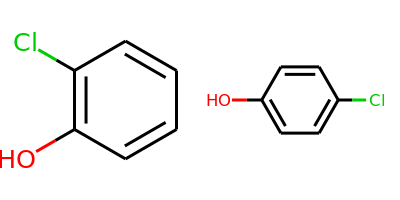

####################
mobley_1178614~mobley_7200804


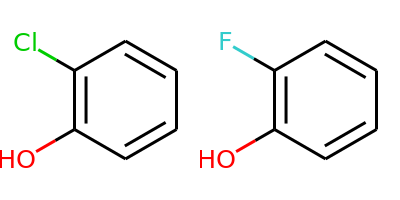

####################
mobley_1178614~mobley_7295828


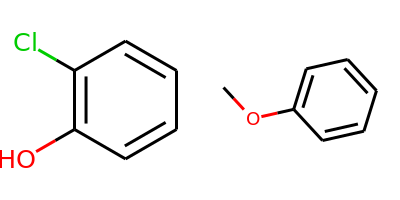

####################
mobley_1178614~mobley_7608462


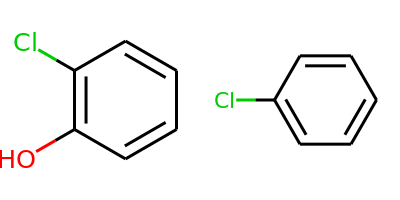

####################
mobley_1178614~mobley_8057732


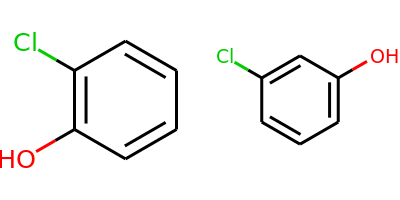

####################
mobley_1178614~mobley_852937


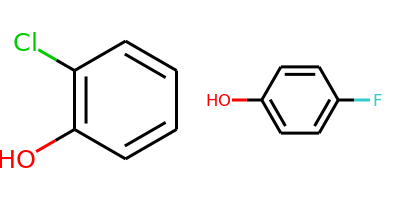

####################
mobley_1178614~mobley_8691603


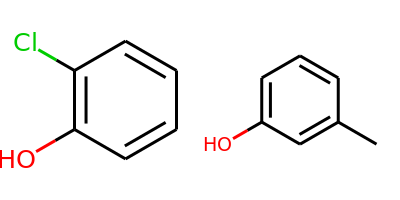

####################
mobley_1231151~mobley_1662128


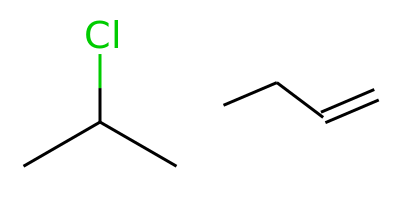

####################
mobley_1231151~mobley_1857976


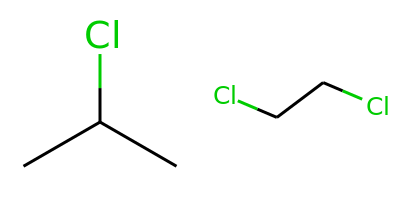

####################
mobley_1231151~mobley_186894


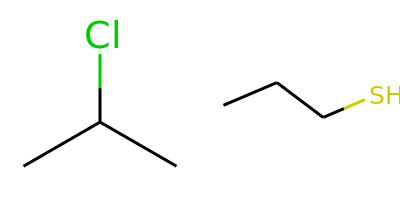

####################
mobley_1231151~mobley_1923244


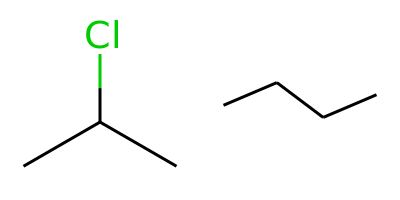

####################
mobley_1231151~mobley_3867265


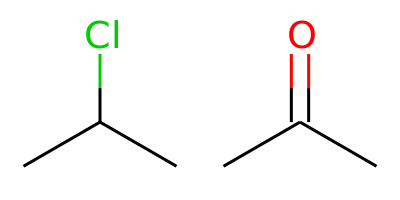

####################
mobley_1231151~mobley_3999471


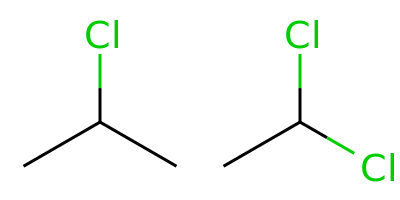

####################
mobley_1231151~mobley_4305650


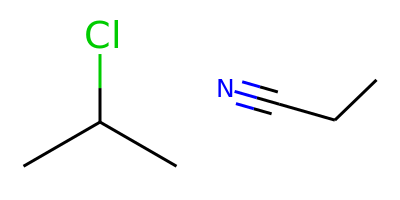

####################
mobley_1231151~mobley_4699732


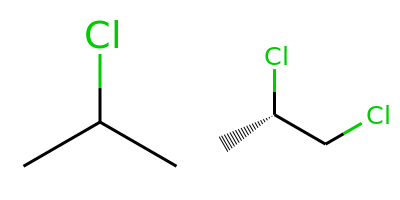

####################
mobley_1231151~mobley_5157661


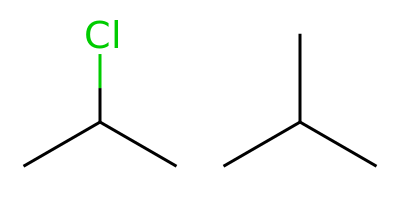

####################
mobley_1231151~mobley_7326982


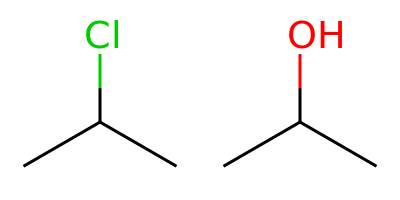

####################
mobley_1231151~mobley_7708038


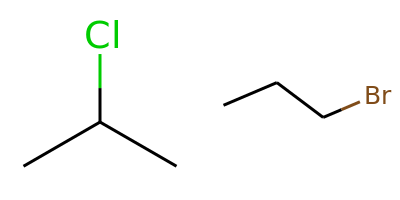

####################
mobley_1231151~mobley_7768165


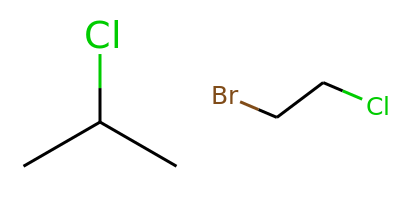

####################
mobley_1231151~mobley_9121449


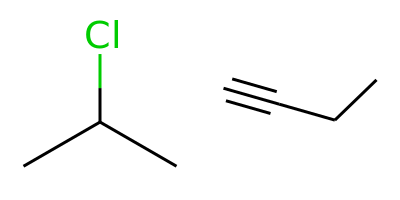

####################
mobley_1231151~mobley_9185328


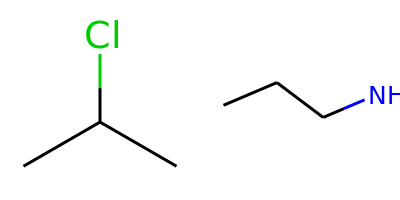

####################
mobley_1231151~mobley_9913368


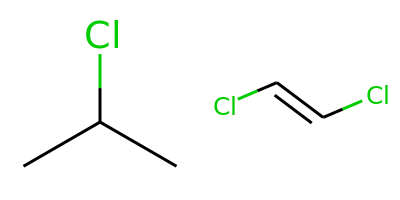

####################
mobley_1328465~mobley_4699732


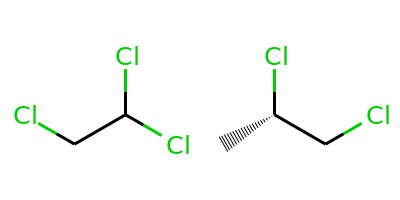

####################
mobley_1328465~mobley_5952846


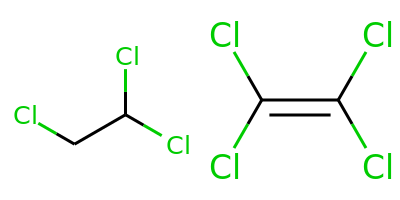

####################
mobley_1328465~mobley_6190089


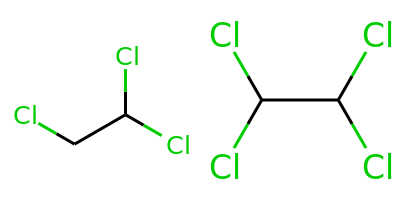

####################
mobley_1328465~mobley_7768165


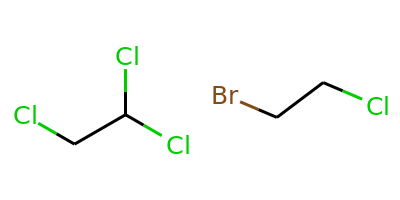

####################
mobley_1328465~mobley_9139060


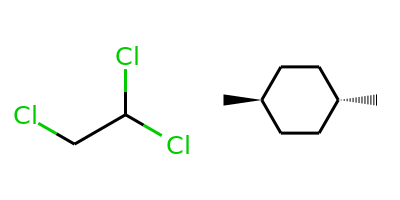

####################
mobley_1328465~mobley_9624458


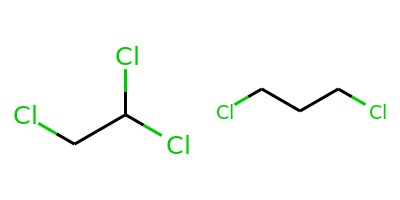

####################
mobley_1328465~mobley_9913368


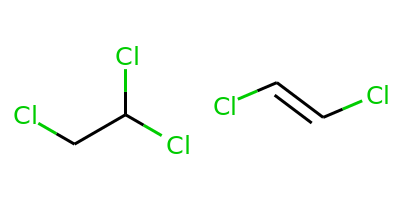

####################
mobley_1760914~mobley_1178614


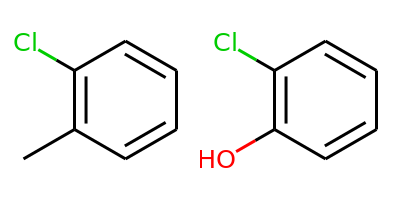

####################
mobley_1760914~mobley_1873346


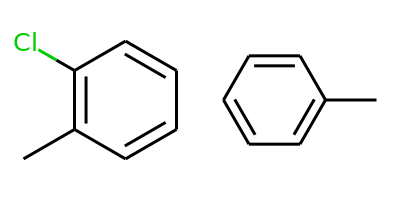

####################
mobley_1760914~mobley_1905088


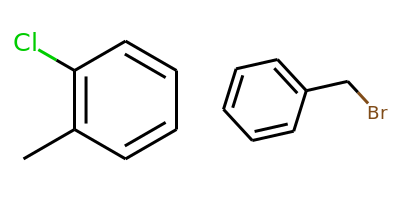

####################
mobley_1760914~mobley_2451097


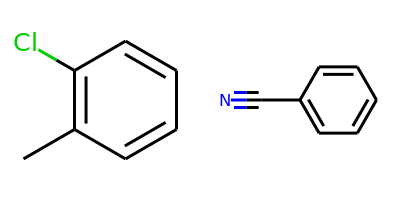

####################
mobley_1760914~mobley_2489709


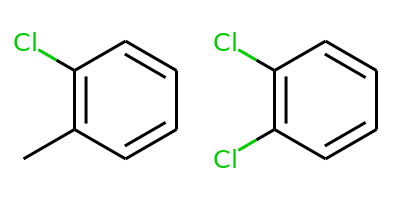

####################
mobley_1760914~mobley_2925352


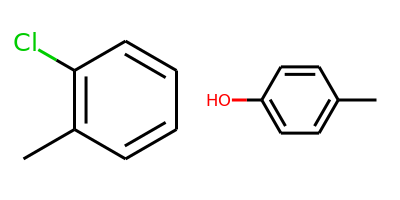

####################
mobley_1760914~mobley_3169935


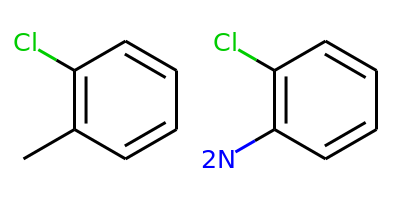

####################
mobley_1760914~mobley_3187514


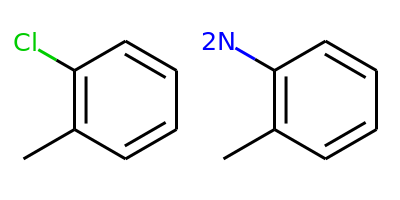

####################
mobley_1760914~mobley_3234716


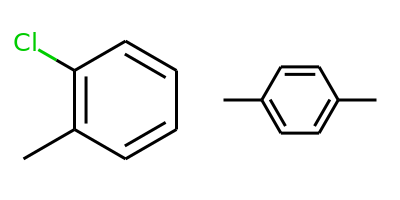

####################
mobley_1760914~mobley_4035953


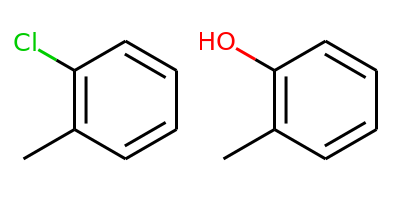

####################
mobley_1760914~mobley_4395315


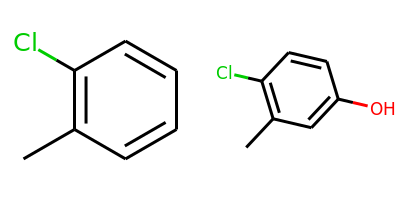

####################
mobley_1760914~mobley_4494568


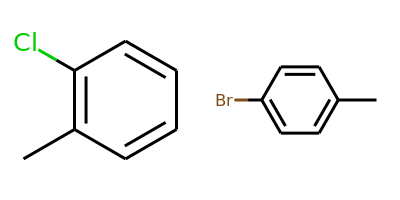

####################
mobley_1760914~mobley_4553008


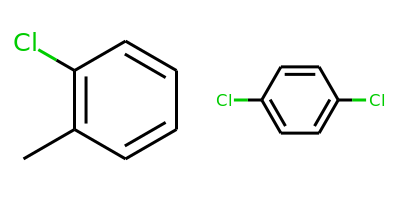

####################
mobley_1760914~mobley_4715906


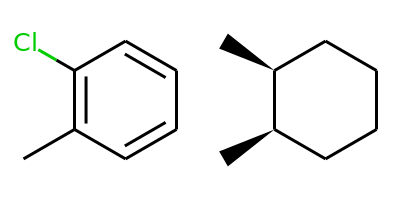

####################
mobley_1855337~mobley_7814642


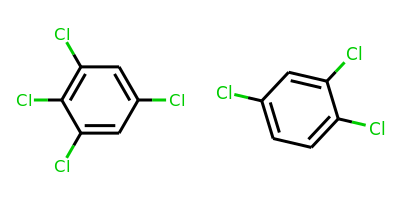

####################
mobley_1857976~mobley_1231151


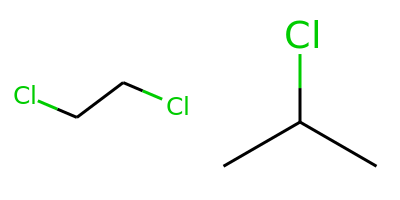

####################
mobley_1857976~mobley_1328465


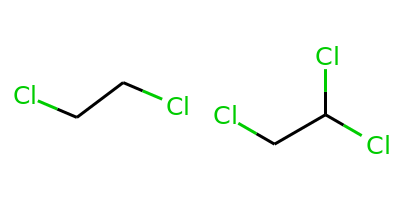

####################
mobley_1857976~mobley_1977493


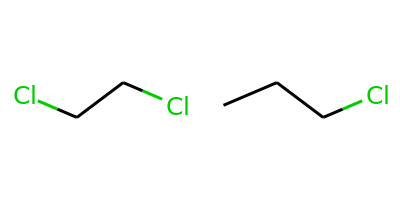

####################
mobley_1857976~mobley_2198613


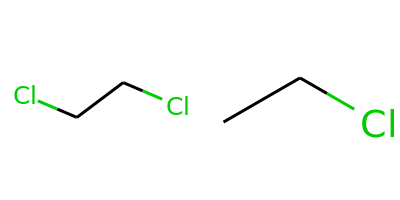

####################
mobley_1857976~mobley_2493732


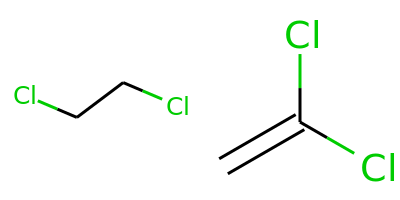

####################
mobley_1857976~mobley_3999471


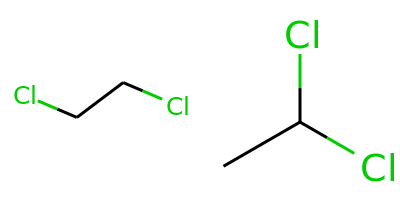

####################
mobley_1857976~mobley_4699732


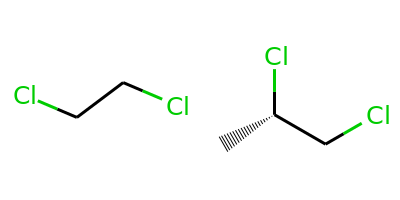

####################
mobley_1857976~mobley_8861672


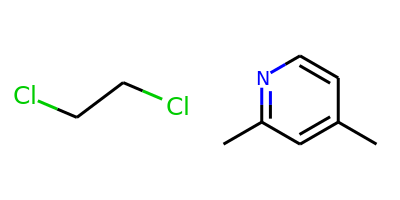

####################
mobley_1893815~mobley_1328465


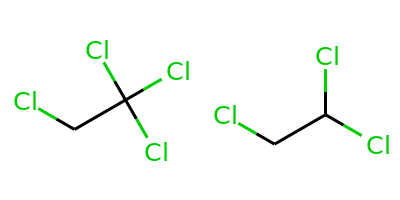

####################
mobley_1893815~mobley_2492140


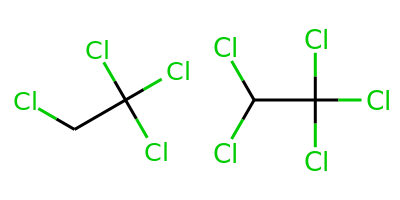

####################
mobley_1893815~mobley_3761215


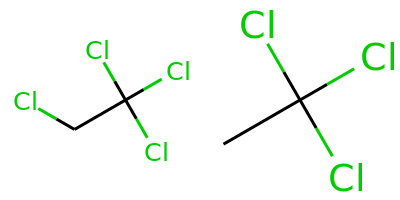

####################
mobley_1893815~mobley_5952846


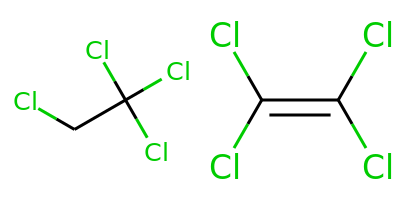

####################
mobley_1893815~mobley_5973402


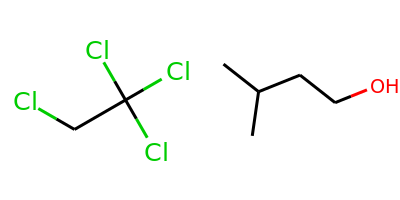

####################
mobley_1893815~mobley_6190089


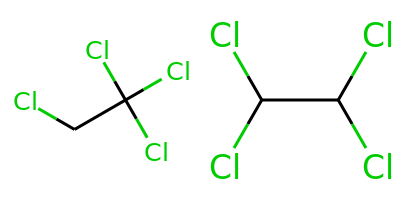

####################
mobley_1893815~mobley_766666


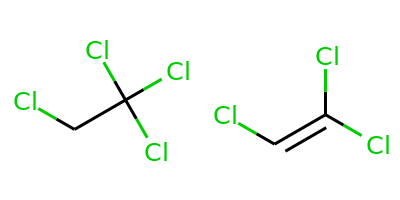

####################
mobley_1893937~mobley_1674094


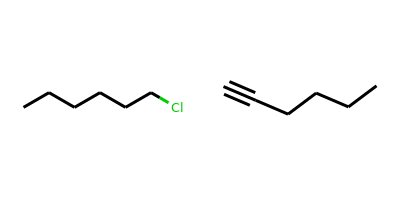

####################
mobley_1893937~mobley_1827204


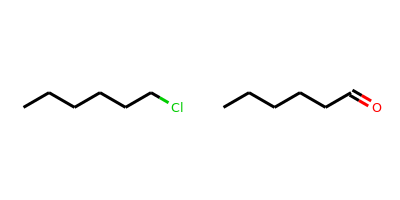

####################
mobley_1893937~mobley_2487143


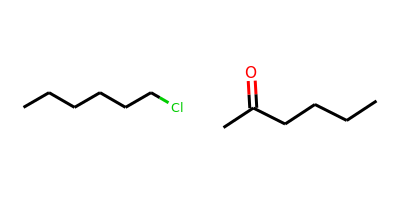

####################
mobley_1893937~mobley_2792521


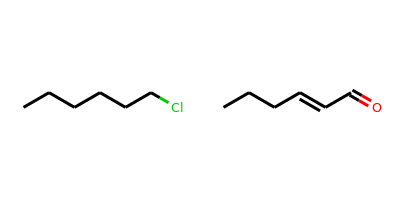

####################
mobley_1893937~mobley_3546460


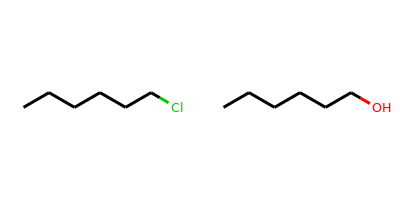

####################
mobley_1893937~mobley_4043987


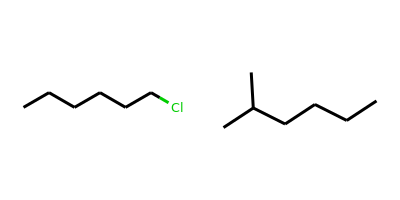

####################
mobley_1893937~mobley_8614858


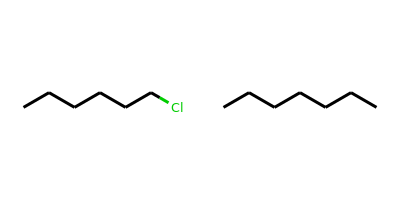

####################
mobley_1893937~mobley_929676


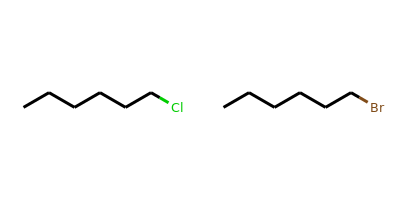

####################
mobley_1893937~mobley_9883303


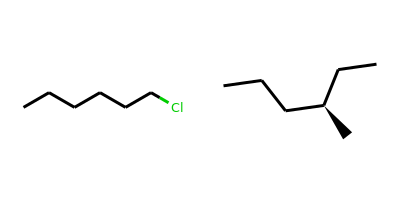

####################
mobley_2178600~mobley_6248915


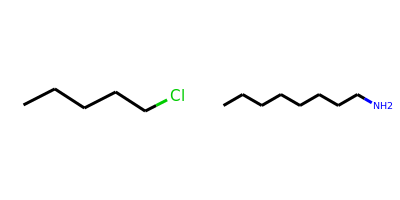

####################
mobley_2681549~mobley_8127829


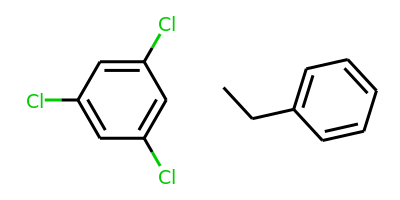

####################
mobley_3761215~mobley_7690440


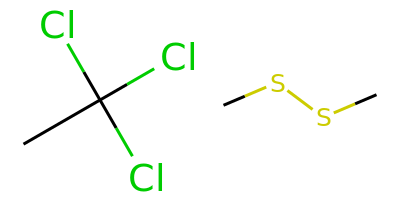

####################
mobley_4465023~mobley_1857976


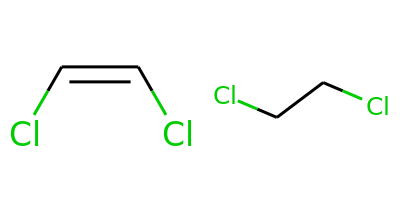

####################
mobley_4506634~mobley_2295058


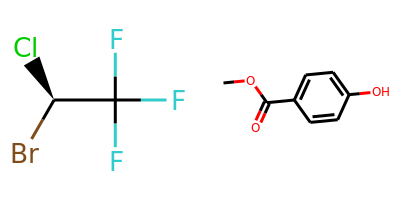

####################
mobley_4506634~mobley_5952846


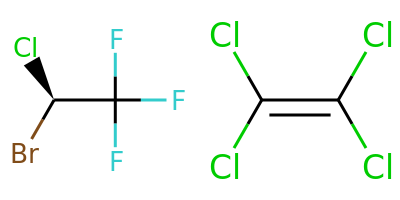

####################
mobley_4553008~mobley_3452749


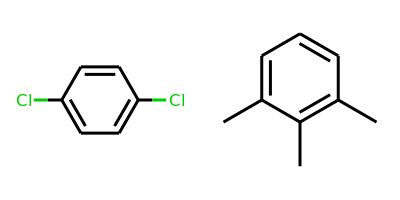

####################
mobley_4603202~mobley_1563176


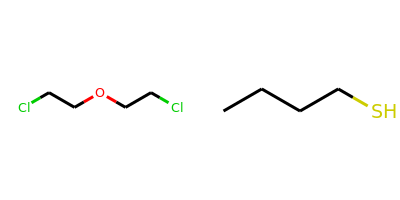

####################
mobley_4603202~mobley_8765203


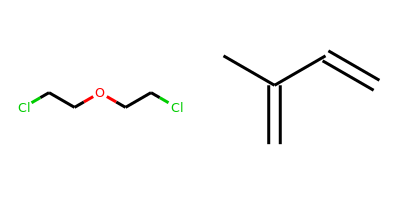

####################
mobley_4850657~mobley_1903702


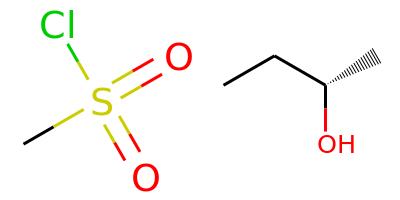

####################
mobley_5347550~mobley_8765203


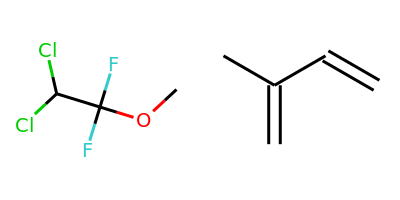

####################
mobley_6190089~mobley_5952846


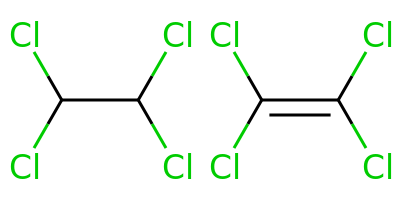

####################
mobley_6235784~mobley_5347550


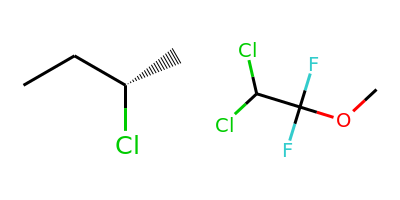

####################
mobley_6474572~mobley_8765203


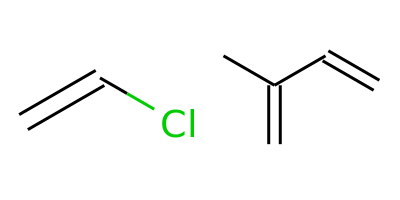

####################
mobley_6804509~mobley_8789465


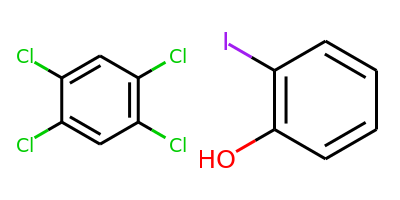

####################
mobley_7099614~mobley_1144156


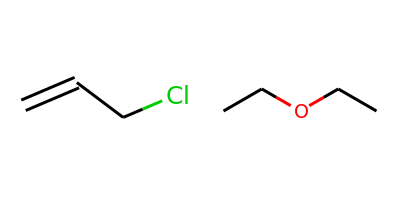

####################
mobley_7099614~mobley_1977493


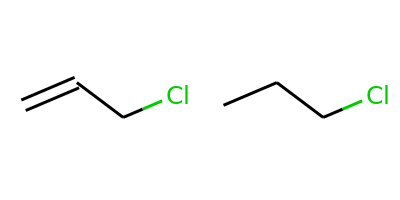

####################
mobley_766666~mobley_5157661


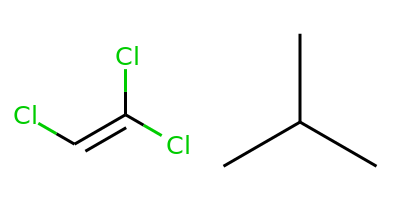

####################
mobley_7768165~mobley_3269565


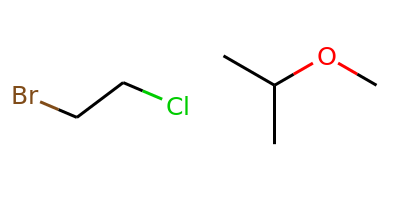

####################
mobley_9913368~mobley_8427539


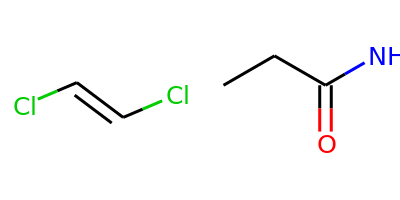

In [11]:
# read in list of perturbations that resulted in 
# 'particle coordinate is NaN' error on section9 vacuum runs on NxN freesolv
with open("nans_vac_list.csv", "r") as readfile:
    reader = csv.reader(readfile)
    for index in reader:

        ligA = index[0].split("~")[0]
        ligB = index[0].split("~")[1]

        ligA_mol = Chem.rdmolfiles.MolFromMolFile("/home/jscheen/projects/HYDRA_LEARN/FREESOLV/"+ligA+".pdb.sdf")
        ligB_mol = Chem.rdmolfiles.MolFromMolFile("/home/jscheen/projects/HYDRA_LEARN/FREESOLV/"+ligB+".pdb.sdf")

        try:
            #a few mols are a bit buggy, ignore for now.

            Chem.rdDepictor.Compute2DCoords(ligA_mol)
            Chem.rdDepictor.Compute2DCoords(ligB_mol)

            ligA_mol.UpdatePropertyCache()
            ligB_mol.UpdatePropertyCache()

            edge_length = 200
            molA_img = Draw.MolToImage(ligA_mol, size=(edge_length, edge_length), kekulize=True, wedgeBonds=True)
            molB_img = Draw.MolToImage(ligB_mol, size=(edge_length, edge_length), kekulize=True, wedgeBonds=True)

            print("####################")
            print(index[0])
            display(get_concat_h(molA_img, molB_img))
        except:
            pass
